# Path Planning with Quintic Functions in Frenét Coordinate System

This is an introduction on how to compute a driving path for an autonomous vehicle. In this article, I focus only the trajectory creation. Obstacle perception and avoidance shall be out of scope.

The idea comes from paper 

> Werling, M., Ziegler, J., Kammel, S., & Thrun, S. Optimal Trajectory Generation for Dynamic Street Scenarios in a Frenét Frame. 

I would like to show in detail how this is put into practice. I will omit all references to this paper in this article, as all ideas coming from there or the referenced documents.

Maneuvers of a car shall be as smooth as possible. Hard turns or hard deceleration are only required in dangerous situations. Thus, we need a function that minimizes   Jerk, which is used in physics to describe how much the acceleration changes.

## Frenét Frame

Assume that a car is lateral misplaced from the desired lane and should return to the optimal position while making a compromise between comfort and duration of the maneuver. The same compromise has to be found for the speed of the car. It shall not drive too close to or too far from the vehicle in the front. Two cost function, lateral and longitudinal, can be utilized to minimize jerk. 


![Fig. 2 in Paper: Optimal Trajectory Generation for Dynamic Street Scenarios in a Frenét Frame.](https://raw.githubusercontent.com/mayio/pathplanning/master/_notebooks/PathPlanningImages/FrenetFig2.png)
*Fig. 2 in Paper: Optimal Trajectory Generation for Dynamic Street Scenarios in a Frenét Frame.*

By switching from Cartesian to the Frenét reference frame it is possible to formulate a one dimensional trajectory with the root point $\vec{r}$ along the center line, the perpendicular offset $d$ and the covered arc length $s$. Jerk can be now defined as the derivatives $\dddot{d}$ and $\dddot{s}$. 

## Quintic Polynomials

It can be shown that quintic (fifth-degree) polynomials are the jerk-optimal connection between a start state $P_0 =
[p_0, \dot{p}_0, \ddot{p}_0]$ (position, velocity, acceleration respectivly) and an end state $P_0 = [p_1, \dot{p}_1, \ddot{p}_1]$ within the time interval $T := t_1 − t_0$ in a one-dimensional problem.

Formulation of a quintic polynomial:
$$
\theta (t) = a_0 + a_1 t + a_2 t^2 + a_3 t^3 + a_4 t^4 + a_5 t^5 \tag{1}
$$

## Cubic Polynomials

Trajectories computed with cubic polynomials cause jumps in accelation. They are not jerk optimal for this reason. But it might be helpful to start an example with a lower degree polynomial. This can then easily extended later on. 

Formulation of a cubic polynomial:
$$
\theta (t) = a_0 + a_1 t + a_2 t^2 + a_3 t^3 \tag{2}
$$

$\theta(t)$ can be seen as a distance or way one has go. The velocity and acceleration are the derivatives.

$$
\dot\theta (t) = a_1 + 2 a_2 t + 3 a_3 t^2 \tag{3}
$$
$$
\ddot\theta (t) = 2 a_2 + 6 a_3 t \tag{4}
$$

### Contraints for Cubic Polynomial Solution for Latitudinal Offset

The car returns to its optimal position in a given time interval $T := t_1 − t_0$. The contraint values for pose and kinematic are seen relative. 

$$
\begin{matrix}
t_0 = 0 \\
\theta(t_0) = d && \text{perpendicular offset} \\
\dot\theta(t_0) = \dot{d} && \text{perpendicular velocity} \\
t_1 = \delta t \\
\theta(t_1) = 0 && \text{perpendicular offset} \\
\dot\theta(t_1) = 0 && \text{perpendicular velocity} \\
\end{matrix}
$$

### Find the Coefficents for the Cubic Polynomial Solution for Latitudinal Offset

What we want is to find the coefficents $a_0, a_1, a_2, a_3$ for the cubic function using the contraints. We set the contraints into the equations (2), (3) and (4) for $t_0$ and $t_1$

$$
\begin{matrix}
\theta (t_0) = a_0 + a_1 0 + a_2 0 + a_3 0 \\
\theta (t_0) = a_0 
\end{matrix}\tag{5}
$$

$\theta (t_0)$ is known from the contraints. Thus:
$$
a_0 = d
$$

Velocity:
$$
\begin{matrix}
\dot\theta (t_0) = a_1 + 2 a_2 0 + 3 a_3 0 \\
\dot\theta (t_0) = a_1 
\end{matrix}\tag{6}
$$
And also $\dot\theta (t_0)$ is known from the contraints. Thus:
$$
a_1 = \dot{d}
$$

The coefficients for time $t_1$ can be computed while inserting the previously found coefficients.

$$
\begin{matrix}
\theta (t_1) = a_0 + a_1 \delta t + a_2 \delta t^2 + a_3 \delta t^3 \\
\theta (t_1) = d + \dot{d} \delta t + a_2 \delta t^2 + a_3 \delta t^3 \\
0 = d + \dot{d} \delta t + a_2 \delta t^2 + a_3 \delta t^3 
\end{matrix}\tag{7}
$$

Velocity for $t_1$
$$
\begin{matrix}
\dot\theta (t_1) = \dot{d} + 2 a_2 \delta t + 3 a_3 \delta t^2 \\ 
\dot\theta (t_1) = \dot{d} + 2 a_2 \delta t + 3 a_3 \delta t^2 \\
0 = \dot{d} + 2 a_2 \delta t + 3 a_3 \delta t^2 
\end{matrix} \tag{8}
$$

We may solve for $a_2$ and $a_3$ now using linear algebra. The quadratic equations (7) and (8) can be expressed with $0 = A b + C$. 

$$
\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}
=
\begin{bmatrix}
\delta t^2 && \delta t^3 \\
2 \delta t && 3 \delta t^2 \\
\end{bmatrix}
\begin{bmatrix}
a_2 \\
a_3 \\
\end{bmatrix}
+
\begin{bmatrix}
d + \dot{d} \delta t \\
\dot{d} \\
\end{bmatrix}
$$

Lets rearrange and multiply with $A^{-1}$ we get

$$
\begin{matrix}
-C = A b\\
A^{-1} (-C) = A^{-1} A b \\
b = A^{-1} (-C) \\
\end{matrix}
$$
$$
\begin{bmatrix}
a_2 \\
a_3 \\
\end{bmatrix}
=
\begin{bmatrix}
\delta t^2 && \delta t^3 \\
2 \delta t && 3 \delta t^2 \\
\end{bmatrix}^{-1}
\begin{bmatrix}
-d - \dot{d} \delta t \\
-\dot{d} \\
\end{bmatrix}
$$ 

The same can be done also in longitudinal direction for $s$;

### Python example

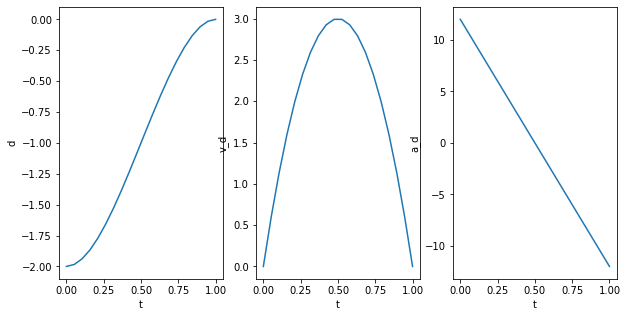

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_polynomial_coefficients(d_0, d_dot_0, delta_t):
  a0 = d_0
  a1 = d_dot_0

  A = np.array([ [delta_t**2,delta_t**3], 
               [2 * delta_t, 3 * delta_t**3]])

  C = np.array([[d_0 + d_dot_0 * delta_t], 
                [d_dot_0]]) * -1                

  b = np.linalg.solve(A,C)

  a2 = b[0]
  a3 = b[1]

  return (a0, a1, a2, a3)

def cubic_polynomial(coefficients, t):
  a0 = coefficients[0]
  a1 = coefficients[1]
  a2 = coefficients[2]
  a3 = coefficients[3]
  theta_pos = a0 + a1 * t + a2 * t**2 + a3 * t**3
  theta_vel = a1 + 2 * a2 * t + 3 * a3 * t**2
  theta_acc = 2 * a2 + 6 * a3 * t
  return (theta_pos, theta_vel, theta_acc)

# setting the contraints
d_0 = -2.
d_dot_0 = 0.
delta_t = 1.

coefficients = cubic_polynomial_coefficients(d_0, d_dot_0, delta_t)

t_sample = np.linspace(0,delta_t, 20)
d = []
d_dot = []
d_dot_dot = []

for t in t_sample:
   (pos,vel,acc) = cubic_polynomial(coefficients, t)
   d.append(pos)
   d_dot.append(vel)
   d_dot_dot.append(acc)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.set(xlabel='t', ylabel='d')
ax1.plot(t_sample, d)

ax2.set(xlabel='t', ylabel='v_d')
ax2.plot(t_sample, d_dot)

ax3.set(xlabel='t', ylabel='a_d')
ax3.plot(t_sample, d_dot_dot)

plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

The trajectory is a function that converges smoothly towards the desired perpendicular offset. 

Also the the velocity is a smooth function. A velocity of 0 was defined for the start and end point. It increases and descreases continiously without any jumps. 

Wheras the the acceleration jumps directly to high values. 

## Extending to Quintic Polynomials

Deriving the quations for the quintic polynomials is very similar to the cubic derivation.

$$
\begin{matrix}
\theta (t) = a_0 + a_1 t + a_2 t^2 + a_3 t^3 + a_4 t^4 + a_5 t^5 && position \\
\dot\theta (t) = a_1 + 2 a_2 t + 3 a_3 t^2 + 4 a_4 t^3 + 5 a_5 t^4 && velocity \\
\ddot\theta (t) = 2 a_2 + 6 a_3 t + 12 a_4 t^2 + 20 a_5 t^3 && acceleration \\
\end{matrix}
$$

### Contraints

The contraints are now formulated generally. That allows using them for the lateral and longitudinal trajectory.

$$
\begin{matrix}
t_0 = 0 \\
\theta(t_0) = w_0 && \text{perpendicular or logitudinal offset} \\
\dot\theta(t_0) = v_0 && \text{perpendicular or logitudinal velocity} \\
\ddot\theta(t_0) = \dot{v}_0 && \text{perpendicular or logitudinal acceleration} \\
t_1 = \delta t \\
\theta(t_1) = w_1 && \text{perpendicular or logitudinal offset} \\
\dot\theta(t_1) = v_1 && \text{perpendicular or logitudinal velocity} \\
\ddot\theta(t_1) = \dot{v}_1 && \text{perpendicular or logitudinal acceleration} \\
\end{matrix}
$$

### Solving for Coefficients

Insert $t_0$ and the known constraint values into the quintic polynomial and its derivatives.

$$
\begin{matrix}
\theta (t_0) = a_0 + a_1 0 + a_2 0 + a_3 0 + a_4 0 + a_5 0  \\
a_0 = w_0  \\
\dot\theta (t_0) = a_1 + 2 a_2 0 + 3 a_3 0 + 4 a_4 0 + 5 a_5 0 \\
a_1 = v_0 \\
\ddot\theta (t_0) = 2 a_2 + 6 a_3 0 + 12 a_4 0 + 20 a_5 0  \\
a_2 = \frac{\dot{v}_0}{2}
\end{matrix}
$$

The other three coefficients can be found by inserting $t_1$, contraints and the already computed coefficients into the quintic polynomial and its derivatives.


$$
\begin{matrix}
\theta (t_1) = a_0 + a_1 \delta t + a_2 \delta t^2 + a_3 \delta t^3 + a_4 \delta t^4 + a_5 \delta t^5 \\
w_1 = w_0 + v_0 \delta t + \frac{\dot{v}_0}{2} \delta t^2 + a_3 \delta t^3 + a_4 \delta t^4 + a_5 \delta t^5 \\ \\
\dot\theta (t_1) = a_1 + 2 a_2 \delta t + 3 a_3 \delta t^2 + 4 a_4 \delta  t^3 + 5 a_5 \delta  t^4 \\
v_1 = v_0 + 2 \frac{\dot{v}_0}{2} \delta t + 3 a_3 \delta t^2 + 4 a_4 \delta  t^3 + 5 a_5 \delta  t^4 \\ \\
\ddot\theta (t_1) = 2 a_2 + 6 a_3 \delta t + 12 a_4 \delta t^2 + 20 a_5 \delta t^3 \\
\dot{v}_1 = 2 \frac{\dot{v}_0}{2} + 6 a_3 \delta t + 12 a_4 \delta t^2 + 20 a_5 \delta t^3 \\
\end{matrix}
$$

These eqations can be rearranged by moving all constants to the left side and the unknown terms to the right

$$
\begin{matrix}
w_1 - w_0 - v_0 \delta t - \frac{\dot{v}_0}{2} \delta t^2 =  a_3 \delta t^3 + a_4 \delta t^4 + a_5 \delta t^5 \\
v_1 - v_0 - 2 \frac{\dot{v}_0}{2} \delta t =  3 a_3 \delta t^2 + 4 a_4 \delta  t^3 + 5 a_5 \delta  t^4 \\ 
\dot{v}_1 - 2 \frac{\dot{v}_0}{2} =  6 a_3 \delta t + 12 a_4 \delta t^2 + 20 a_5 \delta t^3
\end{matrix}
$$

Again, the coefficcients $a_3$, $a_4$ and $a_5$ can be be found with linear algebra. The above tree equation can be expressed as $C = A b$. 

$$
\begin{bmatrix}
w_1 - w_0 - v_0 \delta t - \frac{\dot{v}_0}{2} \delta t^2 \\
v_1 - v_0 - 2 \frac{\dot{v}_0}{2} \delta t \\
\dot{v}_1 - 2 \frac{\dot{v}_0}{2} \\
\end{bmatrix}
=
\begin{bmatrix}
\delta t^3 && \delta t^4 && \delta t^5 \\
3 \delta t^2 && 4 \delta  t^3 && 5 \delta  t^4 \\ 
6 \delta t && 12 \delta t^2 && 20 \delta t^3
\end{bmatrix}
\begin{bmatrix}
a_3 \\
a_4 \\
a_5 \\
\end{bmatrix}
$$

Lets multiply with $A^{-1}$ we get

$$
\begin{matrix}
C = A b\\
A^{-1} C = A^{-1} A b \\
b = A^{-1} C \\
\end{matrix}
$$
$$
\begin{bmatrix}
a_3 \\
a_4 \\
a_5 \\
\end{bmatrix}
=
\begin{bmatrix}
\delta t^3 && \delta t^4 && \delta t^5 \\
3 \delta t^2 && 4 \delta  t^3 && 5 \delta  t^4 \\ 
6 \delta t && 12 \delta t^2 && 20 \delta t^3
\end{bmatrix}^{-1}
\begin{bmatrix}
w_1 - w_0 - v_0 \delta t - \frac{\dot{v}_0}{2} \delta t^2 \\
v_1 - v_0 - 2 \frac{\dot{v}_0}{2} \delta t \\
\dot{v}_1 - 2 \frac{\dot{v}_0}{2} \\
\end{bmatrix}
$$

Using the quintic polynamial and its derivatives we may compute now $d$, $\dot{d}$, $\ddot{d}$ as well as $s$, $\dot{s}$, $\ddot{s}$ in the Frenét frame.


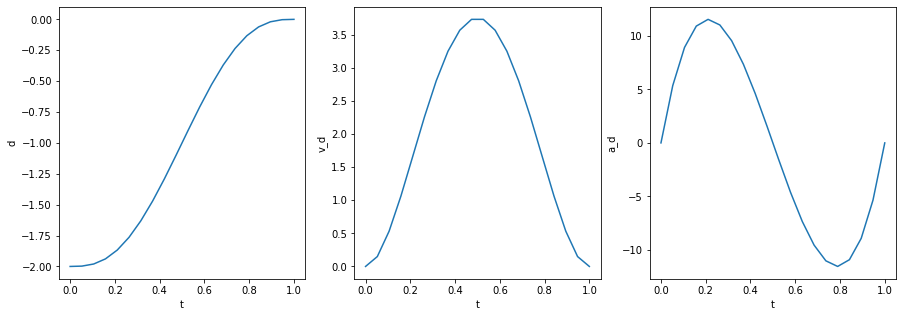

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def quintic_polynomial_coefficients(w0, w1, v0, v1, v_dot0, v_dot1, delta_t):
  a0 = w0 # initial offset
  a1 = v0 # initial speed
  a2 = v_dot0 / 2. 

  dt = delta_t

  A = np.array([[    dt**3,      dt**4,      dt**5], 
                [3 * dt**2,  4 * dt**3,  5 * dt**4],
                [6 * dt   , 12 * dt**2, 20 * dt**3]])

  C = np.array([[w1 - w0 - v0 * dt - a2 * dt**2],
                [v1 - v0 - 2 * a2 * dt],
                [v_dot1 - 2 * a2]])
                

  b = np.linalg.solve(A,C)

  a3 = b[0]
  a4 = b[1]
  a5 = b[2]

  return (a0, a1, a2, a3, a4, a5)

def quintic_polynomial(coefficients, t):
  a0 = coefficients[0]
  a1 = coefficients[1]
  a2 = coefficients[2]
  a3 = coefficients[3]
  a4 = coefficients[4]
  a5 = coefficients[5]
  theta_pos = a0 + a1 * t + a2 * t**2 + a3 * t**3 + a4 * t**4 + a5 * t**5
  theta_vel = a1 + 2 * a2 * t + 3 * a3 * t**2 + 4 * a4 * t**3 + 5 * a5 * t**4
  theta_acc = 2 * a2 + 6 * a3 * t + 12 * a4 * t**2 + 20 * a5 * t**3
  return (theta_pos, theta_vel, theta_acc)

# setting the contraints
d_0 = -2.       # start position
d_dot0 = 0.    # start velocity
d_dot_dot0 = 0. # start acceleration

d_1 = 0.        # end position
d_dot1 = 0.    # end velocity
d_dot_dot1 = 0. # end acceleration

delta_t = 1.

coefficients = quintic_polynomial_coefficients(
    d_0, d_1, d_dot0, d_dot1, d_dot_dot0, d_dot_dot1, delta_t)

t_sample = np.linspace(0,delta_t, 20)
d = []
d_dot = []
d_dot_dot = []

for t in t_sample:
   (pos,vel,acc) = quintic_polynomial(coefficients, t)
   d.append(pos)
   d_dot.append(vel)
   d_dot_dot.append(acc)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.set(xlabel='t', ylabel='d')
ax1.plot(t_sample, d)

ax2.set(xlabel='t', ylabel='v_d')
ax2.plot(t_sample, d_dot)

ax3.set(xlabel='t', ylabel='a_d')
ax3.plot(t_sample, d_dot_dot)

plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

The main difference to the cubic function is that function for acceleration is now also smooth and free of jerk.

## Frenét to global cartesian coordinates

The referenced paper describes well how to move from the Frenét frame to the global reference frame. In short: The optimal path vector is known. Its position and orientation can be used to rotate and translate the vectors $[s, d]^T$, $[\dot{s}, \dot{d}]^T$, $[\ddot{s}, \ddot{d}]^T$ to the desired reference.

## Path Selection and Costs


